# Decicion Tree

In [ ]:
import pandas as pd

#data
popcorn = ["Yes","Yes","No","No","Yes","Yes","No"]
soda = ["Yes","No","Yes","Yes","Yes","No","No"]
age = [7,12,18,30,38,50,83]
#label
ice = ["False","False","True","True","True","False","False"]

df = pd.DataFrame({"popcorn":popcorn,"soda":soda,"age":age,"ice":ice})
df

,popcorn,soda,age,ice
0,Yes,Yes,7,False
1,Yes,No,12,False
2,No,Yes,18,True
3,No,Yes,30,True
4,Yes,Yes,38,True
5,Yes,No,50,False
6,No,No,83,False


# Menghitung Gini Impure (Ketidakmurnian)

In [ ]:
# Hitung gini popcorn = "Yes"
popcorn_y = df.loc[df["popcorn"] == "Yes"]
popcorn_y_t = len(popcorn_y.loc[df["ice"] == "True"])
popcorn_y_f = len(popcorn_y.loc[df["ice"] == "False"])
gini_popcorn_y = 1 - (popcorn_y_t/(popcorn_y_t+popcorn_y_f))**2 - (popcorn_y_f/(popcorn_y_t+popcorn_y_f))**2

# Hitung gini popcorn = "No"
popcorn_n = df.loc[df["popcorn"] == "No"]
popcorn_n_t = len(popcorn_n.loc[df["ice"] == "True"])
popcorn_n_f = len(popcorn_n.loc[df["ice"] == "False"])
gini_popcorn_n = 1 - (popcorn_n_t/(popcorn_n_t+popcorn_n_f))**2 - (popcorn_n_f/(popcorn_n_t+popcorn_n_f))**2

gini_popcorn_total = (len(popcorn_y)/(len(popcorn_y)+len(popcorn_n)))*gini_popcorn_y + (len(popcorn_n)/(len(popcorn_y)+len(popcorn_n)))*gini_popcorn_n
round(gini_popcorn_total,3)

0.405

In [ ]:
# Hitung gini soda = "Yes"
soda_y = df.loc[df["soda"] == "Yes"]
soda_y_t = len(soda_y.loc[df["ice"] == "True"])
soda_y_f = len(soda_y.loc[df["ice"] == "False"])
gini_soda_y = 1 - (soda_y_t/(soda_y_t+soda_y_f))**2 - (soda_y_f/(soda_y_t+soda_y_f))**2

# Hitung gini soda = "No"
soda_n = df.loc[df["soda"] == "No"]
soda_n_t = len(soda_n.loc[df["ice"] == "True"])
soda_n_f = len(soda_n.loc[df["ice"] == "False"])
gini_soda_n = 1 - (soda_n_t/(soda_n_t+soda_n_f))**2 - (soda_n_f/(soda_n_t+soda_n_f))**2

gini_soda_total = (len(soda_y)/(len(soda_y)+len(soda_n)))*gini_soda_y + (len(soda_n)/(len(soda_y)+len(soda_n)))*gini_soda_n
round(gini_soda_total, 3)

0.214

In [ ]:
# Variable untuk mengambil nilai tengah dari dua integer 
middle_point = []
for i in range(len(df["age"])-1):
  middle_point.append((df["age"][i] + df["age"][i+1])/2)

gini_age = {}
for i in middle_point:
  # Mencari gini kurang dari 
  under_point = df.loc[df["age"] < i]
  under_point_t = len(under_point.loc[df["ice"] == "True"])
  under_point_f = len(under_point.loc[df["ice"] == "False"])
  gini_under_point = 1 - (under_point_t/(under_point_t+under_point_f))**2 - (under_point_f/(under_point_t+under_point_f))**2
  gini_under_point

  # Mencari gini lebih dari
  over_point = df.loc[df["age"] > i]
  over_point_t = len(over_point.loc[df["ice"] == "True"])
  over_point_f = len(over_point.loc[df["ice"] == "False"])
  gini_over_point = 1 - (over_point_t/(over_point_t+over_point_f))**2 - (over_point_f/(over_point_t+over_point_f))**2

  gini_point_total = (len(under_point)/(len(under_point)+len(over_point)))*gini_under_point + (len(over_point)/(len(under_point)+len(over_point)))*gini_over_point
  gini_age[i] = round(gini_point_total, 3)

# Ambil nilai gini impure paling kecil, jika ada 2 kita ambil nilai pertama. 
# Disini kita dapatkan pada anngka 15.0 dengan nilai gini 0.343 berarti aturannya dipasanga "Jika n > 15.0"
min(gini_age, key=gini_age.get)


15.0

# Perbandingan nilai Gini Impure

In [ ]:
print(f'Popcorn: {gini_popcorn_total}')
print(f'Soda: {gini_soda_total}')
print(f'Age: {min(gini_age.values())}')
# kita dapatkan bahwa nilai gini terkecil adalah Soda, maka dari itu soda adalah root untuk Decision Tree data ini

Popcorn: 0.40476190476190477
Soda: 0.21428571428571427
Age: 0.343


# Mencari nilai gini terhadap soda

#### Mencari gini popcorn

In [ ]:
# Jika kita melihat kembali keatas bahwa soda dengan value "No" memiliki nilai gini 0
# Artinya itu sudah menjadi acuan dan tidak akan ada branch(ranting) lagi ke bawahnya, jadi tidak usah dihitung

s_popcorn_y = df.loc[(df["soda" ] == "Yes") & (df["popcorn"] == "Yes")]
s_popcorn_y_t = len(s_popcorn_y.loc[df["ice"] == "True"])
s_popcorn_y_f = len(s_popcorn_y.loc[df["ice"] == "False"])
gini_s_popcorn_y = 1 - (s_popcorn_y_t/(s_popcorn_y_t+s_popcorn_y_f))**2 - (s_popcorn_y_f/(s_popcorn_y_t+s_popcorn_y_f))**2

s_popcorn_n = df.loc[(df["soda" ] == "Yes") & (df["popcorn"] == "No")]
s_popcorn_n_t = len(s_popcorn_n.loc[df["ice"] == "True"])
s_popcorn_n_f = len(s_popcorn_n.loc[df["ice"] == "False"])
gini_s_popcorn_n = 1 - (s_popcorn_n_t/(s_popcorn_n_t+s_popcorn_n_f))**2 - (s_popcorn_n_f/(s_popcorn_n_t+s_popcorn_n_f))**2
gini_s_popcorn_total = (len(s_popcorn_y)/(len(s_popcorn_y)+len(s_popcorn_n)))*gini_s_popcorn_y + (len(s_popcorn_y)/(len(s_popcorn_y)+len(s_popcorn_n)))*gini_s_popcorn_n
gini_s_popcorn_total

0.25

#### Mencari gini age

In [ ]:
s_middle_point = []
soda_y = df.loc[df["soda"] == "Yes"].reset_index()
for i in range(len(soda_y)-1):
  s_middle_point.append((soda_y["age"][i] + soda_y["age"][i+1])/2)

gini_s_age = {}
for i in s_middle_point:
  # Mencari gini kurang dari 
  under_point = soda_y.loc[soda_y["age"] < i]
  under_point_t = len(under_point.loc[soda_y["ice"] == "True"])
  under_point_f = len(under_point.loc[soda_y["ice"] == "False"])
  gini_under_point = 1 - (under_point_t/(under_point_t+under_point_f))**2 - (under_point_f/(under_point_t+under_point_f))**2
  gini_under_point

  # Mencari gini lebih dari
  over_point = soda_y.loc[soda_y["age"] > i]
  over_point_t = len(over_point.loc[soda_y["ice"] == "True"])
  over_point_f = len(over_point.loc[soda_y["ice"] == "False"])
  gini_over_point = 1 - (over_point_t/(over_point_t+over_point_f))**2 - (over_point_f/(over_point_t+over_point_f))**2

  gini_point_total = (len(under_point)/(len(under_point)+len(over_point)))*gini_under_point + (len(over_point)/(len(under_point)+len(over_point)))*gini_over_point
  gini_s_age[i] = round(gini_point_total, 3)

gini_s_age

{12.5: 0.0, 24.0: 0.25, 34.0: 0.333}

#### Perbandingan nilai gini impure terhadap soda


In [ ]:
print(f'Popcorn: {gini_s_popcorn_total}')
print(f'Age: {min(gini_s_age.values())}')
# kita dapatkan bahwa nilai gini terkecil adalah Age, maka dari itu age adalah ranting setelah soda == "Yes"
# Dan memiliki nilai gini 0 maka tidak akan ada lagi ranting setelahnya

Popcorn: 0.25
Age: 0.0


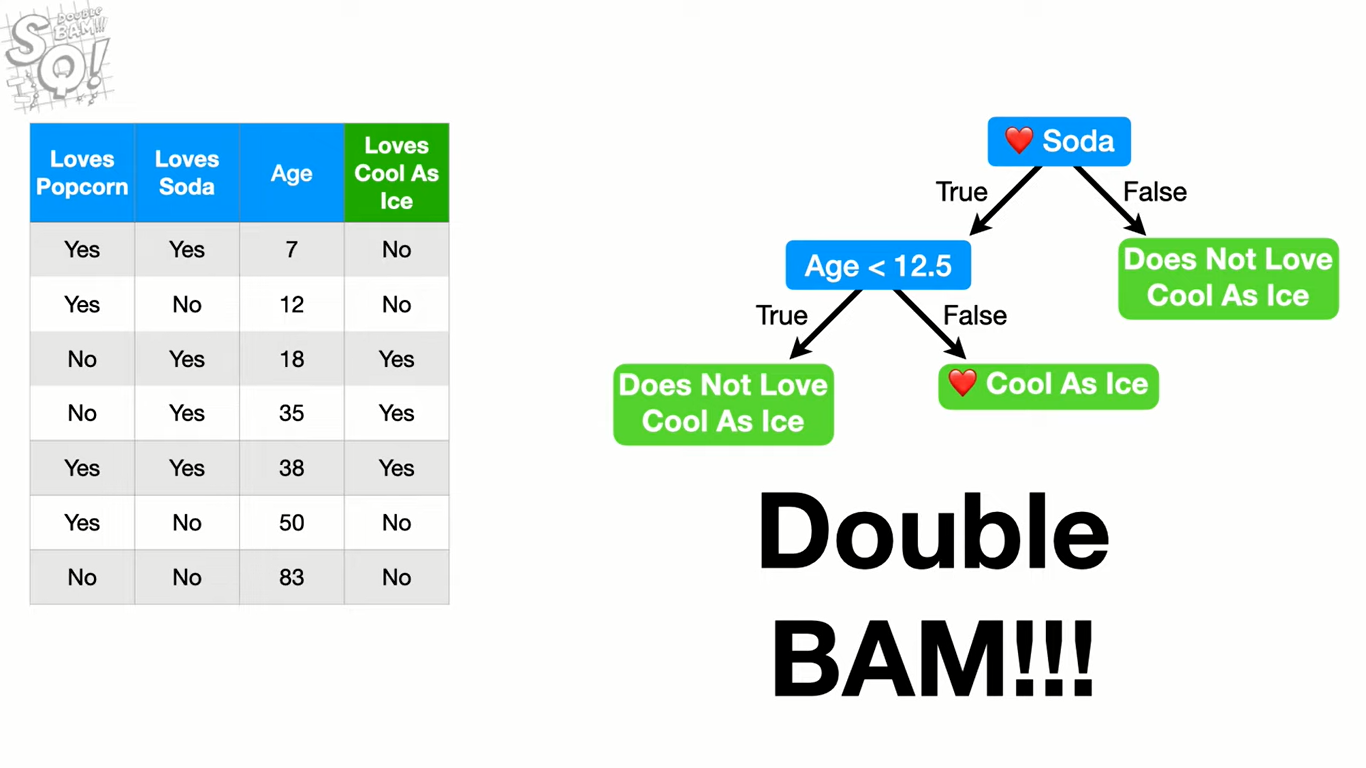

# Kesimpulan
Dapat kita simpulkan bahwa kita mendapatkan soda sebagai root, hal ini didapatkan ketika ketika menghitug gini awal dari semua data. Kemudian kita mencari posisi yang diduduki saat Soda = "Yes" dan saat Soda = "No". Karena gini saat Soda = "No" adalah 0 maka tidak akan ada ranting lagi dibawahnya, jadi kita hanya akan mencari saat Soda = "Yes" (Data yang diambil hanya data yang value soda-nya adalah "Yes").
Dan kita dapatkan age untuk menduduki ranting tersebut, hal ini didapatkan ketika menghitung gini dari Popcorn dan Age (Diambil gini terkecil dari semua gini data continuos/angka) ketika Soda = "Yes". 
Untuk mencari output/hasil/kata yang keluar maka kita lihat jumlah datanya (yes atau no). Ketika Soda = "Yes" & Age <= 12.5 kita dapatkan jumlah "No" lebih banyak, maka kita simpulkan bahwa data tersebut "Tidak suka es dingin"